### Distribution of number of blaze rod drops

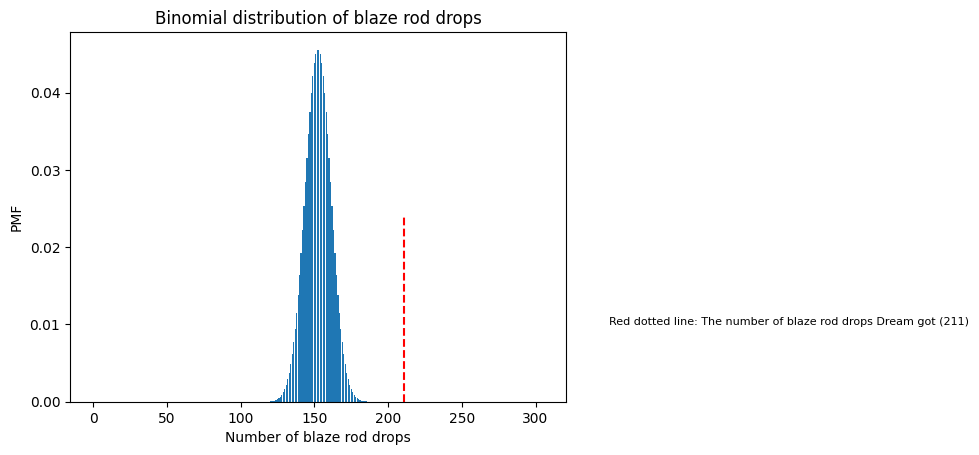

In [8]:
import matplotlib.pyplot as plt
from scipy.stats import binom

# Set the parameters for the binomial distribution 
n = 305  # Number of trials
p = 0.5  # Probability of success
dreams_result = 211

# x values
x_values = list(range(0, n+1))
y_values = [binom.pmf(x, n, p) for x in x_values]

# plot the graph
plt.bar(x_values, y_values)
plt.title("Binomial distribution of blaze rod drops")
plt.axvline(dreams_result, color='r', linestyle='--', ymax = 0.5)
plt.xlabel("Number of blaze rod drops")
plt.ylabel("PMF")
plt.text(350, 0.01, "Red dotted line: The number of blaze rod drops Dream got (211)", fontsize=8, color='black')
plt.show()

#### plot for pmf >= some threshold

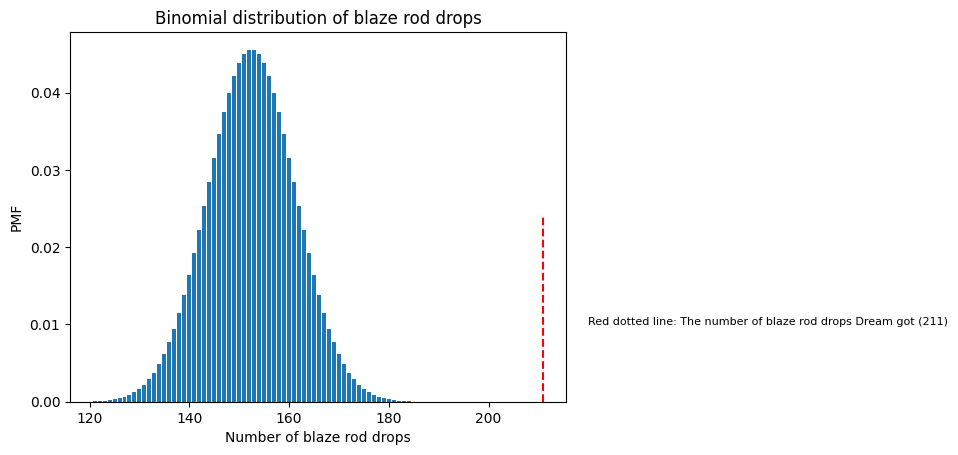

In [9]:
#import matplotlib.pyplot as plt
#from scipy.stats import binom

# Set the parameters for the binomial distribution
# n = 305  # Number of trials
# p = 0.5  # Probability of success
# dreams_result = 211
threshold = 0.00005

# x values and y values
x_values = list(range(0, n+1))
y_values = [binom.pmf(x, n, p) for x in x_values]

# filter
new_x_values = [x for x in x_values if y_values[x] >= threshold]
new_y_values = [y for y in y_values if y>= threshold]

# plot the graph
plt.bar(new_x_values, new_y_values)
plt.title("Binomial distribution of blaze rod drops")
plt.axvline(dreams_result, color='r', linestyle='--', ymax = 0.5)
plt.xlabel("Number of blaze rod drops")
plt.ylabel("PMF")
plt.text(220, 0.01, "Red dotted line: The number of blaze rod drops Dream got (211)", fontsize=8, color='black')
plt.show()

#### Code simulation for distribution of blaze rods

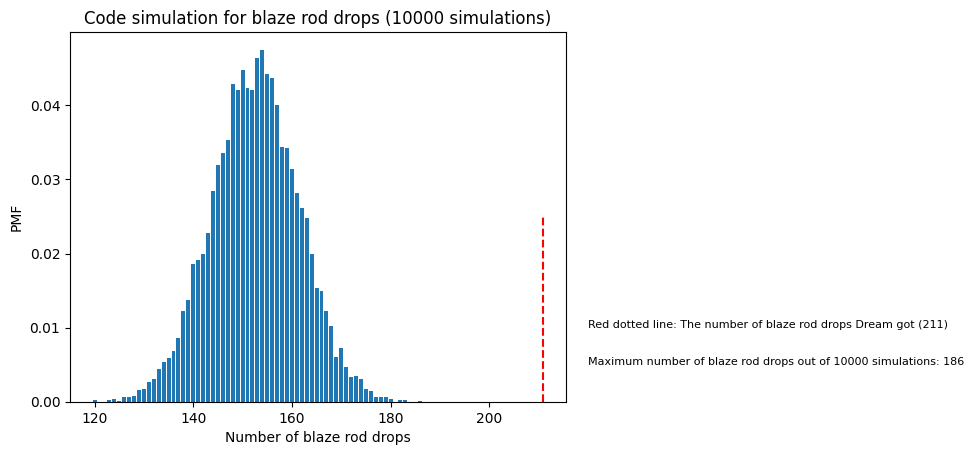

In [10]:
import random
from collections import Counter

# set the parameters
number_of_simulation = 10000
data = [] # storing no. of success of each trial, elements could repeat
n = 305
p = 0.5

# simulate data
for i in range(number_of_simulation):
    success_num = 0
    for j in range(n):
        if random.random() < p:
            success_num += 1
    data.append(success_num)

# clean up the data
dict = Counter(data)
x_values = list(dict.keys())
y_values = list(y/number_of_simulation for y in dict.values()) # turn frequency into relative frequency

max_x = max(x_values)

# plot the graph
plt.bar(x_values, y_values)
plt.title(f"Code simulation for blaze rod drops ({number_of_simulation} simulations)")
plt.axvline(dreams_result, color='r', linestyle='--', ymax = 0.5)
plt.xlabel("Number of blaze rod drops")
plt.ylabel("PMF")
plt.text(220, 0.01, "Red dotted line: The number of blaze rod drops Dream got (211)", fontsize=8, color='black')
plt.text(220, 0.005, f"Maximum number of blaze rod drops out of {number_of_simulation} simulations: {max_x}", fontsize=8, color='black')
plt.show()